# Dataset and imports

In [53]:
import numpy as np, pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [54]:
data = load_breast_cancer()
X, y = data.data, data.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=0)

print(f"Training set: {Xtrain.shape, ytrain.shape}")
print(f"Validation set: {Xvalid.shape, yvalid.shape}")
print(f"Test set: {Xtest.shape, ytest.shape}")

Training set: ((318, 30), (318,))
Validation set: ((137, 30), (137,))
Test set: ((114, 30), (114,))


Perform Logistic Regression on this dataset

c:\Users\priva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


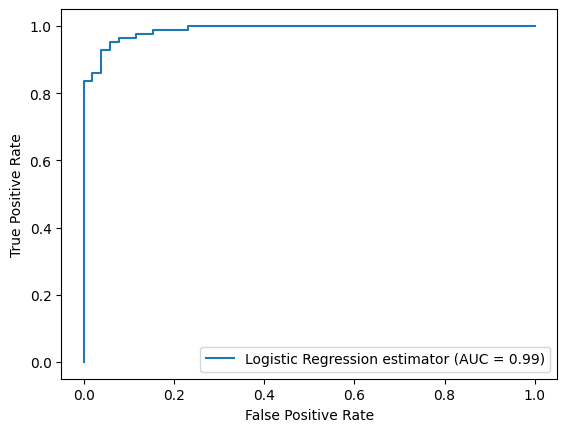

In [57]:
lr_model = LogisticRegression(penalty=None, max_iter=1000).fit(Xtrain, ytrain)

ypred = lr_model.predict_proba(Xvalid)[:, 1]
fpr, tpr, thresholds = roc_curve(yvalid, ypred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                estimator_name='Logistic Regression estimator').plot()

In [59]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01923077, 0.01923077,
        0.03846154, 0.03846154, 0.05769231, 0.05769231, 0.07692308,
        0.07692308, 0.11538462, 0.11538462, 0.15384615, 0.15384615,
        0.23076923, 0.23076923, 1.        ]),
 array([0.        , 0.01176471, 0.83529412, 0.83529412, 0.85882353,
        0.85882353, 0.92941176, 0.92941176, 0.95294118, 0.95294118,
        0.96470588, 0.96470588, 0.97647059, 0.97647059, 0.98823529,
        0.98823529, 1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 9.56108782e-01, 9.42911652e-01,
        9.13195892e-01, 8.76530650e-01, 5.64481265e-01, 1.82979561e-01,
        1.46950717e-01, 8.84090376e-02, 1.03942720e-02, 2.39914359e-03,
        7.25045745e-04, 2.82179150e-04, 2.05005823e-04, 4.00530198e-06,
        3.04770836e-06, 4.99274196e-67]))